<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/Proyecto_Modelaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas import DataFrame #Para hacer una tabla con los datos
from math import exp,sqrt,log
from scipy.stats import norm, binom #norm pra B&S y binm para Binomial
def nodos(s,u,d,n):
    numeros = [numero+1 for numero in range(1,n+1)]
    l=[0]
    for i in range(1,n+1):
        numeronuevo = l[i-1]+i
        l.append(numeronuevo)
    longitud = sum(numeros)
    lista_nodos = [s]
    i = 0
    while len(lista_nodos) <= longitud:
        if i == 0 or lista_nodos.index(s) in l:
            up = s*u
            lista_nodos.append(up)
            down = s*d
            lista_nodos.append(down)
        else:
            down = s*d
            lista_nodos.append(down)
        s = lista_nodos[i+1]
        i+=1
    return lista_nodos

def tabla(s,opcion,T,n,r,k,u,d,sigma,Dt,Probabilidad,uno_probabilidad):
    if opcion == 1:
        option = 'Call Europeo'
    elif opcion ==2:
        option =  'Put Europeo'
    elif opcion ==3:
        option = 'Call Americano'
    elif opcion == 4:
        option = 'Put Americano'
    if sigma == 0:
        datos={'Dato         ':['Opción','S0','k','T','n','r','u','d','Dt','Probabilidad a la alza', 'Probabilidad a la baja'],
        '   Valor ingresado   ':[option, s,k,T,n,r,u,d,Dt,Probabilidad,uno_probabilidad]}
        tabla_datos = DataFrame(datos, columns = ['Dato         ','   Valor ingresado   '],
        index=['Tipo de opción','Precio incial del activo subyacente','Precio de ejercicio','Tiempo de vencimiento','Número de periodos',
        'Tasa libre de riesgo','Porcentaje de subida','Porcentaje de bajada', 'Delta t', 'Probabilidad a la alza', 'Probabilidad a la baja'])
    else:
        datos={'Dato         ':['Opción','S0','k','T','n','r','sigma','u','d','Dt','Probabilidad a la alza', 'Probabilidad a la baja'],
        '   Valor ingresado   ':[option, s,k,T,n,r,sigma,u,d,Dt,Probabilidad,uno_probabilidad]}
        tabla_datos = DataFrame(datos, columns = ['Dato         ','   Valor ingresado   '],
        index=['Tipo de opción','Precio incial del activo subyacente','Precio de ejercicio','Tiempo de vencimiento','Número de periodos',
        'Tasa libre de riesgo','Volatilidad','Porcentaje de subida','Porcentaje de bajada', 'Delta t', 'Probabilidad a la alza', 'Probabilidad a la baja'])
    print('\n')
    print("""
        ---------------------------------------
        || Resumen de los datos introducidos ||
        ---------------------------------------""")
    print(tabla_datos.round(4))

def mbinomial(s,n,r,k,u,d,sigma,Dt,Probabilidad,uno_probabilidad): #Funcion para determinar el precio de las opcion
    if sigma == 0:
        u = u
        d = d
    else:
        u  = round(exp(sigma*sqrt(Dt)),10)
        d  = round(1/u,10)
    valor_presente1 = exp(-n*r*Dt)
    valor_presenteT = exp(-r*Dt)

    #Calculando el valor de las opciones

    #Call y Put Europeo
    cuenta_call = 0
    cuenta_put = 0
    Nodos = nodos(s,u,d,n)
    Nodos1 = Nodos.copy()
    Nodos1 = Nodos1[::-1]
    lcu_y_cd = []
    for i in range(n+1):
        lcu_y_cd.append(Nodos1[i])
    lcu_y_cd = lcu_y_cd[::-1]
    for i in range(n+1):
        #Call Europeo
        cu = max(lcu_y_cd[i]-k,0)
        #Put Europeo
        pu = max(k-lcu_y_cd[i],0)
        cuenta_call  = cuenta_call + binom.pmf(n-i, n, Probabilidad)*cu
        cuenta_put = cuenta_put + binom.pmf(n-i,n,Probabilidad)*pu
    valor_del_call = valor_presente1 * cuenta_call
    valor_del_put = valor_presente1 * cuenta_put


    #Call y Put Americano
    lcu_y_cd = []
    lcu_y_cd_nuevo = []

    for i in range(len(Nodos)-(n+1)):
        lcu_y_cd.append(Nodos[i])
    lcu_y_cd = lcu_y_cd[::-1]
    lcu_y_cd_nuevo = lcu_y_cd.copy()
    lcu_y_cd_call = lcu_y_cd.copy()
    lcu_y_cd_put = lcu_y_cd.copy()

    for i in range(n): #Evaluamos los ultimos n valores desde el cero es decir n+1
        nodo_evaluar = lcu_y_cd_nuevo[i]
        up = nodo_evaluar*u
        maxup_call = max(up-k,0)
        maxup_put = max(k-up,0)

        down = nodo_evaluar*d
        maxdown_call = max(down-k,0)
        maxdown_put = max(k-down,0)

        call = valor_presenteT*(maxup_call*Probabilidad + maxdown_call*uno_probabilidad)
        put = valor_presenteT*(maxup_put*Probabilidad + maxdown_put*uno_probabilidad)
        rendimiento_ejercer_call = max(nodo_evaluar-k,0)
        rendimiento_ejercer_put = max(k-nodo_evaluar,0)

        if rendimiento_ejercer_call >= call:
            lcu_y_cd_call[i] = rendimiento_ejercer_call
        else:
            lcu_y_cd_call[i] = call         #Hasta aquí solo han cambiado los penultimos del call

        if rendimiento_ejercer_put >= put:
            lcu_y_cd_put[i] = rendimiento_ejercer_put
        else:
            lcu_y_cd_put[i] = put         #Hasta aquí solo han cambiado los penultimos del put

#Vamos a comparar las listas lcy_y_lcd vs lcu_ylcd_call y la del put para esto se necesitan en orden Ascendente
    lcu_y_cd = lcu_y_cd[::-1]
    lcu_y_cd_call = lcu_y_cd_call[::-1]
    lcu_y_cd_put = lcu_y_cd_put[::-1]
    i,h=0,0
    for j in lcu_y_cd_call:
        if j != lcu_y_cd[i]:
            indice_call = lcu_y_cd_call.index(j)
            break
        i+=1
    for j in lcu_y_cd_put:
        if j != lcu_y_cd[h]:
            indice_put = lcu_y_cd_put.index(j)
            break
        h+=1
    contador=0
    N=n
        #Ahora empezamos a cambiar los elementos a partir de indice-1
    for i in range(len(lcu_y_cd)-(n)): #A la longitud de la lista de nodos recortada le restamos los n valores desde el cero evaluados antes
        nodo_evaluar_call =  lcu_y_cd_call[indice_call-1]
        nodo_evaluar_put =  lcu_y_cd_put[indice_put-1]
        call = valor_presenteT*(lcu_y_cd_call[indice_call+(N-2)]*Probabilidad + lcu_y_cd_call[indice_call+(N-1)]*uno_probabilidad)
        put = valor_presenteT*(lcu_y_cd_put[indice_put+(N-2)]*Probabilidad + lcu_y_cd_put[indice_put+(N-1)]*uno_probabilidad)
        rendimiento_ejercer_call = max(nodo_evaluar_call-k,0)
        rendimiento_ejercer_put = max(k-nodo_evaluar_put,0)
        if rendimiento_ejercer_call >= call:
            lcu_y_cd_call[indice_call-1] = rendimiento_ejercer_call
        else:
            lcu_y_cd_call[indice_call-1] = call
        indice_call = indice_call -1

        if rendimiento_ejercer_put >= put:
            lcu_y_cd_put[indice_put-1] = rendimiento_ejercer_put
        else:
            lcu_y_cd_put[indice_put-1] = put
        indice_put = indice_put -1
        contador = contador + 1
        if contador == N-1:
            N = N-1
            contador = 0
    valor_del_call_americano = valor_presenteT*(Probabilidad*lcu_y_cd_call[1] + uno_probabilidad*lcu_y_cd_call[2])
    valor_del_put_americano = valor_presenteT*(Probabilidad*lcu_y_cd_put[1] + uno_probabilidad*lcu_y_cd_put[2])

    return valor_del_call, valor_del_put, valor_del_call_americano, valor_del_put_americano

def blancscholes(s,k,T,r,sigma,opcion):
    d1 = (log(s/k,exp(1)) + (r + (sigma**2/2)) * T )/(sigma * sqrt(T))
    d2 = d1 - (sigma*sqrt(T))
    if opcion == 1:
        c = s * norm.cdf(d1) - k*exp(-r*T)*norm.cdf(d2)
        option = 'Call Europeo'
        print(f' \n El valor del {option} es {c}')
    else:
        c = k*exp(-r*T)*norm.cdf(-d2) - s * norm.cdf(-d1)
        option =  'Put Europeo'
        print(f' \n El valor del {option} es {c}')

    datos={'Dato         ':['Opción','S0','k','T','r','sigma', 'd1', 'd2','op'],
    '   Valor ingresado   ':[option,s,k,T,r,sigma,d1,d2,c]}
    tabla_datos = DataFrame(datos, columns = ['Dato         ','   Valor ingresado   '],
    index=['Tipo de opción','Precio incial del activo subyacente','Precio de ejercicio','Tiempo de vencimiento',
    'Tasa libre de riesgo','Volatilidad','D1', 'D2','Valuación'])
    print("""
        --------------------------
        || Resumen de los datos ||
        --------------------------""")
    print(tabla_datos.round(4))

print("""
--------------------------------------------------------------------
||            Bienvenid@ a la calculadora de opciones             ||
||                                                                ||
|| Por favor introduce los datos que se solicitan a continuación  ||
--------------------------------------------------------------------

""")
modelo = input("""
¿Qué modelo quieres utilizar para valuar la opción?
A) Binomial
B) Binomial con volatilidad
C) Black & Scholes - Merton
""")
modelo = modelo.upper()

opcion = float(input("""
Escribe el número de la opción que será valuada
1) Call Europeo
2) Put Europeo
3) Call Americano
4) Put Americano
 """))
print(f'---Su selección fue el inciso {opcion} ---\n')

s      = float(input("Indica el precio incial del activo subyacente: "))
k      = float(input("Indica el precio de ejercicio: "))
T      = float(input("Indica el tiempo de vencimiento en meses: "))
T = T/12
r      = float(input("Indica la tasa de interés anualizada de forma decimal (Ej. 0.05): "))
if modelo == 'A':
    n  = int(input("Indica el número de periodos: "))
    Dt = T/n
    u  = float(input("Indica el porcentaje/probabilidad de subida con la unidad (Ej. 1.05): "))
    d  = float(input("Indica el porcentaje/probabilidad de bajada con la unidad (Ej. 0.95): "))
    sigma  = 0
    Probabilidad = (exp(r*Dt) - d)/(u - d)
    uno_probabilidad = 1 - Probabilidad
elif modelo == 'B':
    n  = int(input("Indica el número de periodos: "))
    Dt = T/n
    sigma  = float(input("Indica la volatilidad de manera decimal (Ej. 0.25): "))
    u  = exp(sigma*sqrt(Dt))
    d  = 1/u
    Probabilidad = (exp(r*Dt) - d)/(u - d)
    uno_probabilidad = 1 - Probabilidad
elif modelo == 'C':
    sigma = float(input("Indica la volatilidad de manera decimal (Ej. 0.25): "))

def main():
    if modelo == 'A' or modelo == 'B':
        tabla(s,opcion,T,n,r,k,u,d,sigma,Dt,Probabilidad,uno_probabilidad)
        l = mbinomial(s,n,r,k,u,d,sigma,Dt,Probabilidad,uno_probabilidad)
        if opcion == 1:
            tipo = 'Call Europeo'
            v = 0
        elif opcion == 2:
            tipo = 'Put Europeo'
            v = 1
        elif opcion ==3:
            tipo = 'Call Americano'
            v = 2
        elif opcion ==4:
            tipo = 'Put Americano'
            v = 3
        print('\n')
        print(f'El precio del {tipo} solicitado es:{l[v]} \n')
        print("""
        ---------------------------------------------------------------------------------------------------------------
        || A continuación se muestra una tabla comparativa de la opción solicitada junto a los demás tipos de opción ||
        ---------------------------------------------------------------------------------------------------------------
        """)
        datos={'Opción':['Europeo', 'Europeo','Americano', 'Americano'], 'Precio':[l[0],l[1],l[2],l[3]]}
        tabla_datos = DataFrame(datos, columns = ['Opción','Precio'],
        index=['Call','Put','Call','Put'])
        print('\n')
        print(tabla_datos.round(4))
        print('\n')
    else:
        blancscholes(s,k,T,r,sigma,opcion)


if __name__ == '__main__':
    main()



--------------------------------------------------------------------
||            Bienvenid@ a la calculadora de opciones             ||
||                                                                ||
|| Por favor introduce los datos que se solicitan a continuación  ||
--------------------------------------------------------------------



¿Qué modelo quieres utilizar para valuar la opción?
A) Binomial
B) Binomial con volatilidad
C) Black & Scholes - Merton
A

Escribe el número de la opción que será valuada
1) Call Europeo
2) Put Europeo
3) Call Americano
4) Put Americano
 2
---Su selección fue el inciso 2.0 ---

Indica el precio incial del activo subyacente: 50
Indica el precio de ejercicio: 51
Indica el tiempo de vencimiento en meses: 6
Indica la tasa de interés anualizada de forma decimal (Ej. 0.05): 0.05
Indica el número de periodos: 2
Indica el porcentaje/probabilidad de subida con la unidad (Ej. 1.05): 1.06
Indica el porcentaje/probabilidad de bajada con la unidad (Ej. 0.9

Árbol de convergencia

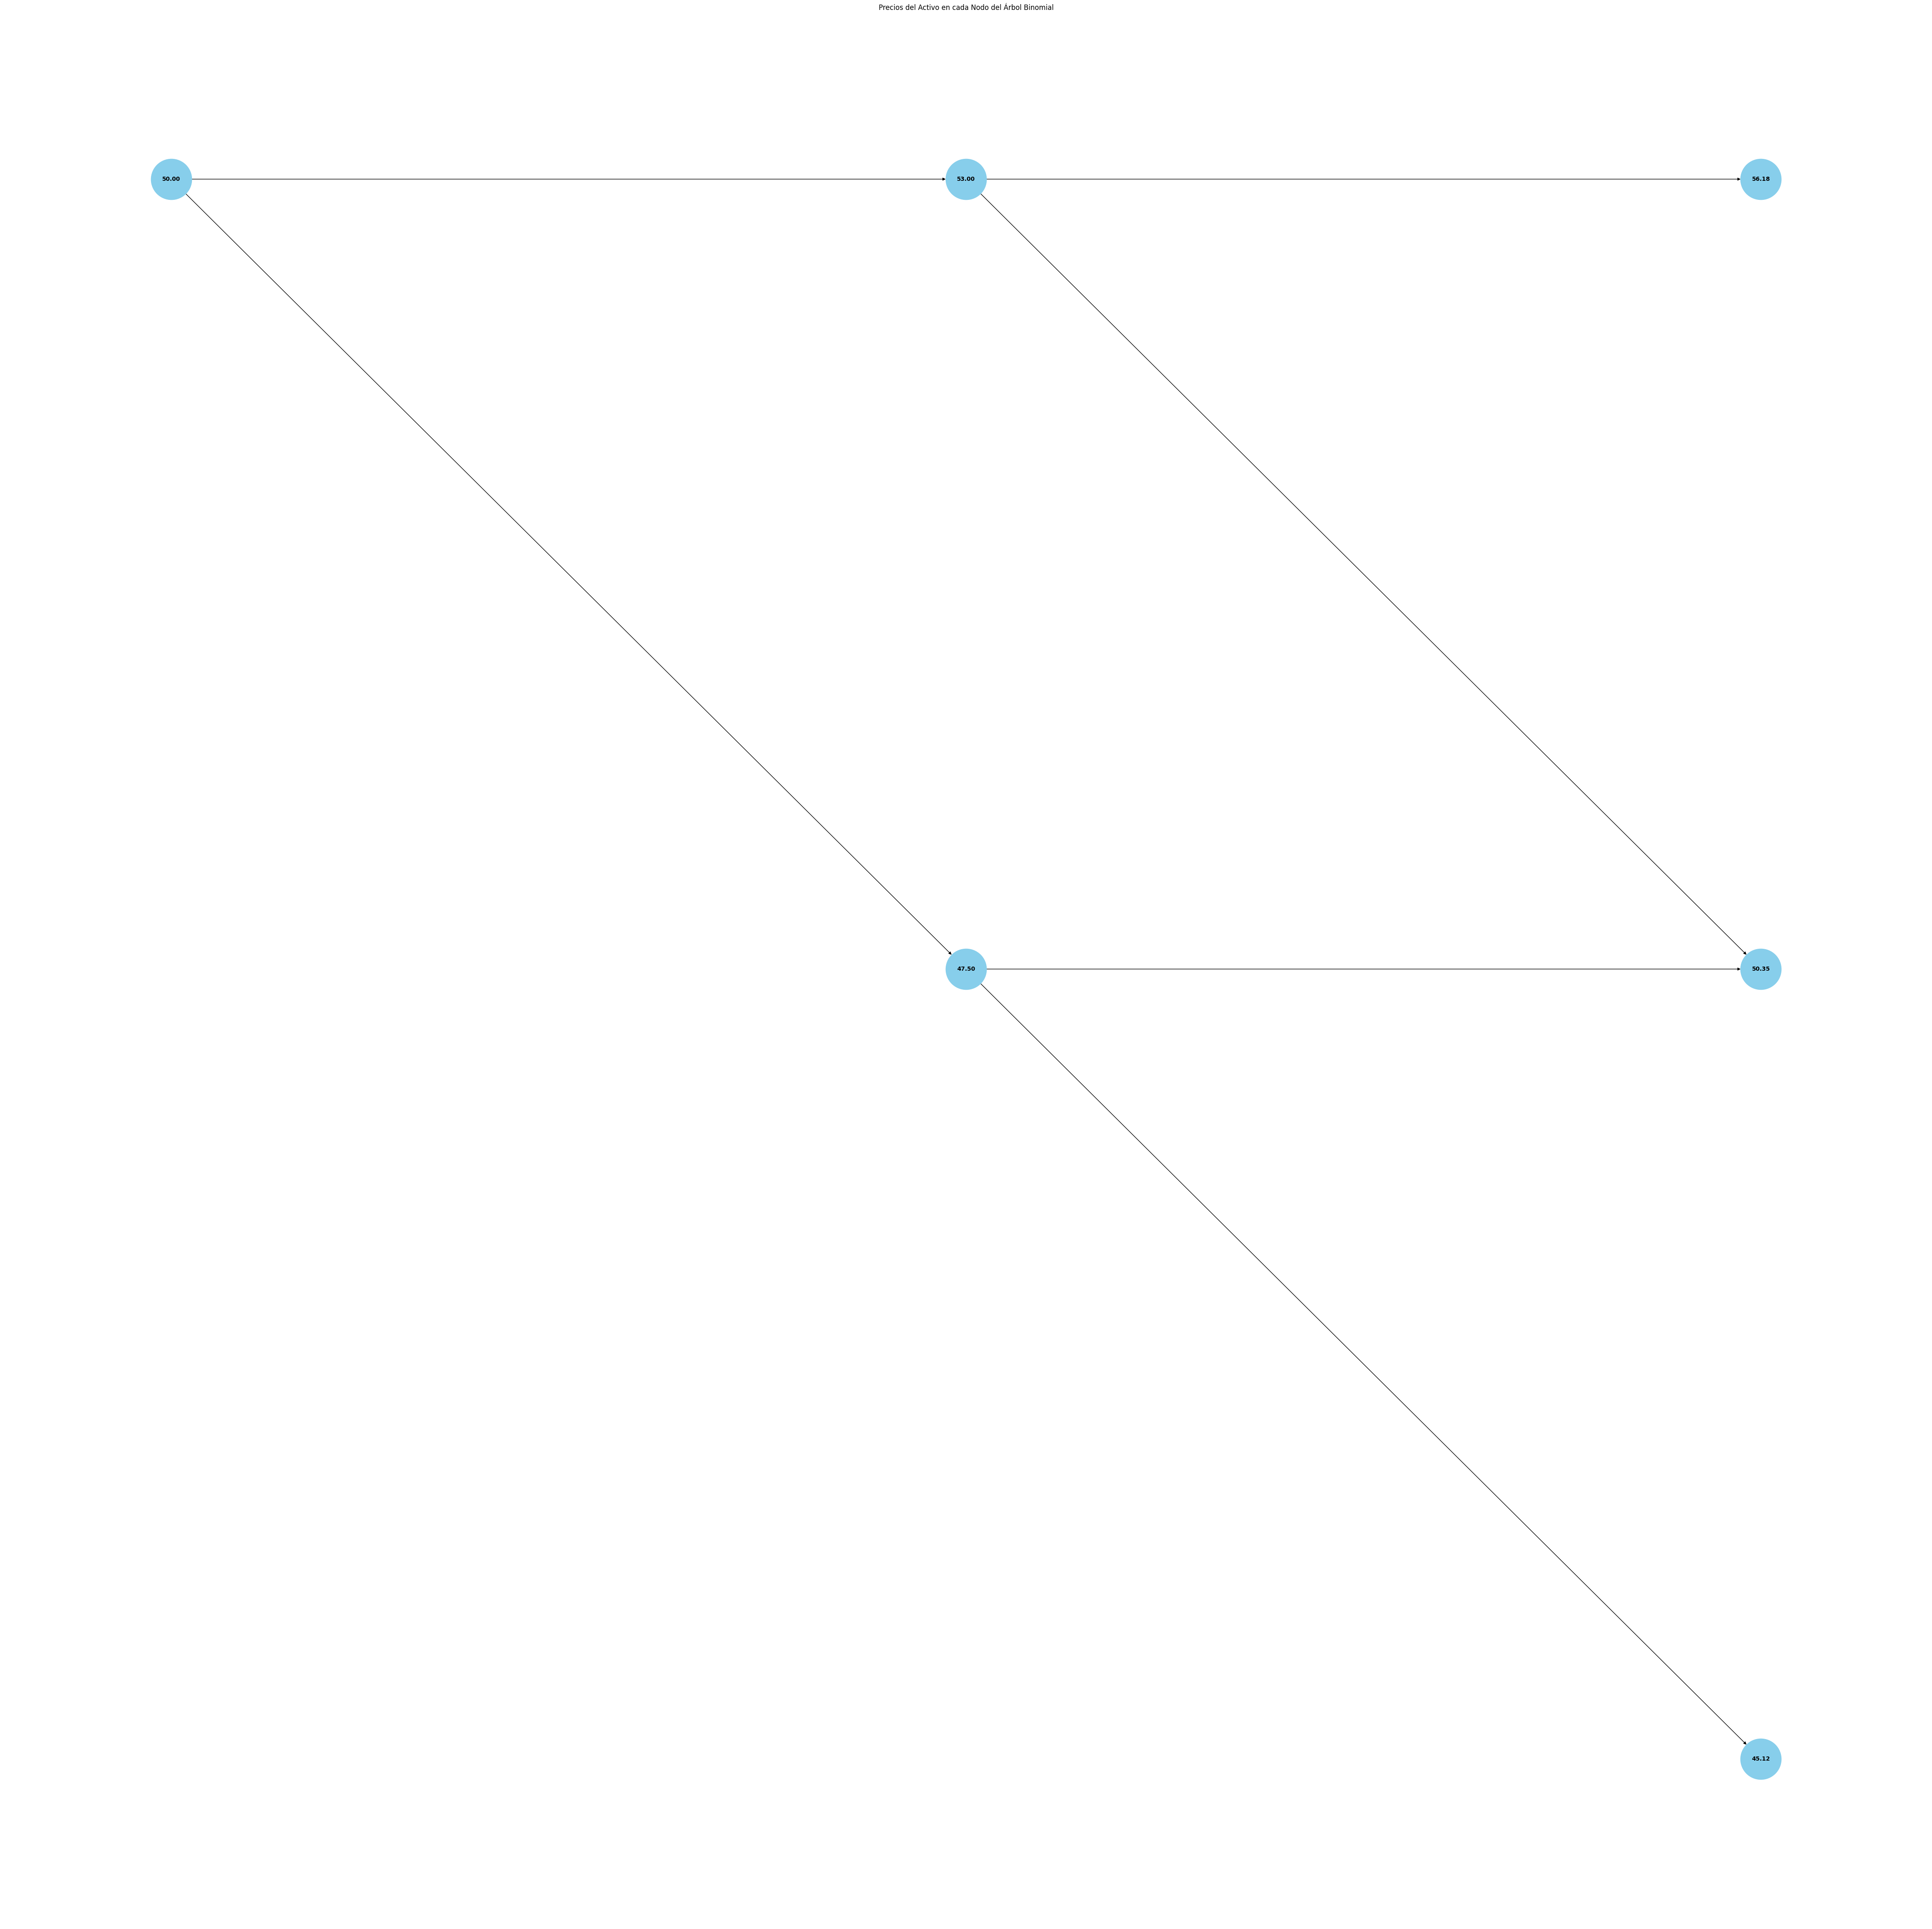

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Función para construir el árbol binomial de precios del activo
def construir_arbol_precios(s, u, d, n):
    precios = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(i + 1):
            precios[j, i] = s* (u ** (i - j)) * (d ** j)
    return precios

# Función para construir el árbol binomial de valores de la opción
def construir_arbol_valores(precios, k, r, Dt, Probabilidad, n, opcion):
    valores = np.zeros((n + 1, n + 1))
    for j in range(n + 1):
        if opcion == '1':  # Call
            valores[j, n] = max(0, precios[j, n] - k)
        elif opcion == '0':  # Put
            valores[j, n] = max(0, k - precios[j, n])

    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            valores[j, i] = np.exp(-r * Dt) * (Probabilidad * valores[j, i + 1] + (1 - Probabilidad) * valores[j + 1, i + 1])
    return valores

# Construir árboles binomiales de precios y valores
precios_arbol = construir_arbol_precios(s, u, d, n)
valores_arbol = construir_arbol_valores(precios_arbol, k, r, Dt, Probabilidad, n, opcion)

# Graficar precios del activo
fig, ax = plt.subplots(figsize=(60, 60))
G = nx.DiGraph()
labels_precios = {}

for i in range(n + 1):
    for j in range(i + 1):
        G.add_node((j, i))
        labels_precios[(j, i)] = f'{precios_arbol[j, i]:.2f}'
        if i < n:
            G.add_edge((j, i), (j, i + 1))
            G.add_edge((j, i), (j + 1, i + 1))

pos = {(j, i): (i, -j) for i in range(n + 1) for j in range(i + 1)}
nx.draw(G, pos, with_labels=False, node_size=5000, node_color='skyblue')
nx.draw_networkx_labels(G, pos, labels=labels_precios, font_size=10, font_weight='bold')
plt.title('Precios del Activo en cada Nodo del Árbol Binomial')
plt.show()


¿Qué modelo quieres utilizar para valuar la opción?
A) Binomial
B) Binomial con volatilidad
C) Black & Scholes - Merton
A

Escribe el número de la opción que será valuada
1) Call Europeo
2) Put Europeo
3) Call Americano
4) Put Americano
2
Indica el precio inicial del activo subyacente: 50
Indica el precio de ejercicio: 51
Indica el tiempo de vencimiento en meses: 6
Indica la tasa de interés anualizada de forma decimal (Ej. 0.05): 0.05
Indica el número de periodos: 2
Indica el porcentaje de subida (Ej. 1.05): 1.06
Indica el porcentaje de bajada (Ej. 0.95): 0.95

        ---------------------------------------
        || Resumen de los datos introducidos ||
        ---------------------------------------
                      Dato Valor ingresado
0                   Opción     Put Europeo
1                       S0            50.0
2                        k            51.0
3                        T             0.5
4                        n               2
5                        r   

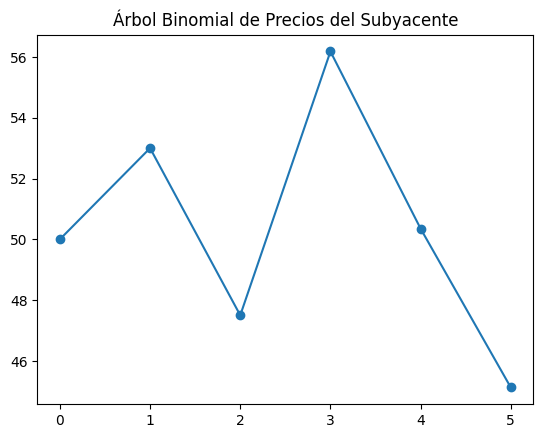

In [9]:
from pandas import DataFrame  # Para hacer una tabla con los datos
from math import exp, sqrt, log
from scipy.stats import norm, binom  # norm para B&S y binom para Binomial
import matplotlib.pyplot as plt  # Para graficar

def nodos(s, u, d, n):
    numeros = [numero + 1 for numero in range(1, n + 1)]
    l = [0]
    for i in range(1, n + 1):
        numeronuevo = l[i - 1] + i
        l.append(numeronuevo)
    longitud = sum(numeros)
    lista_nodos = [s]
    i = 0
    while len(lista_nodos) <= longitud:
        if i == 0 or lista_nodos.index(s) in l:
            up = s * u
            lista_nodos.append(up)
            down = s * d
            lista_nodos.append(down)
        else:
            down = s * d
            lista_nodos.append(down)
        s = lista_nodos[i + 1]
        i += 1
    return lista_nodos

def tabla(s, opcion, T, n, r, k, u, d, sigma, Dt, Probabilidad, uno_probabilidad):
    opcion = int(opcion)  # Asegurarse de que opción sea un entero
    if opcion == 1:
        option = 'Call Europeo'
    elif opcion == 2:
        option = 'Put Europeo'
    elif opcion == 3:
        option = 'Call Americano'
    elif opcion == 4:
        option = 'Put Americano'
    if sigma == 0:
        datos = {'Dato': ['Opción', 'S0', 'k', 'T', 'n', 'r', 'u', 'd', 'Dt', 'Probabilidad a la alza', 'Probabilidad a la baja'],
                 'Valor ingresado': [option, s, k, T, n, r, u, d, Dt, Probabilidad, uno_probabilidad]}
    else:
        datos = {'Dato': ['Opción', 'S0', 'k', 'T', 'n', 'r', 'sigma', 'u', 'd', 'Dt', 'Probabilidad a la alza', 'Probabilidad a la baja'],
                 'Valor ingresado': [option, s, k, T, n, r, sigma, u, d, Dt, Probabilidad, uno_probabilidad]}
    tabla_datos = DataFrame(datos)
    print("""
        ---------------------------------------
        || Resumen de los datos introducidos ||
        ---------------------------------------""")
    print(tabla_datos.round(4))

def mbinomial(s, n, r, k, u, d, sigma, Dt, Probabilidad, uno_probabilidad):
    if sigma != 0:
        u = exp(sigma * sqrt(Dt))
        d = 1 / u
    valor_presente1 = exp(-n * r * Dt)
    cuenta_call = 0
    cuenta_put = 0
    Nodos = nodos(s, u, d, n)
    Nodos1 = Nodos[::-1]
    for i in range(n + 1):
        cu = max(Nodos1[i] - k, 0)
        pu = max(k - Nodos1[i], 0)
        cuenta_call += binom.pmf(n - i, n, Probabilidad) * cu
        cuenta_put += binom.pmf(n - i, n, Probabilidad) * pu
    valor_del_call = valor_presente1 * cuenta_call
    valor_del_put = valor_presente1 * cuenta_put
    return valor_del_call, valor_del_put, Nodos

def blancscholes(s, k, T, r, sigma, opcion):
    d1 = (log(s / k, exp(1)) + (r + (sigma ** 2 / 2)) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    if opcion == 1:
        c = s * norm.cdf(d1) - k * exp(-r * T) * norm.cdf(d2)
        option = 'Call Europeo'
    else:
        c = k * exp(-r * T) * norm.cdf(-d2) - s * norm.cdf(-d1)
        option = 'Put Europeo'
    print(f' \n El valor del {option} es {c}')

def main():
    modelo = input("""
¿Qué modelo quieres utilizar para valuar la opción?
A) Binomial
B) Binomial con volatilidad
C) Black & Scholes - Merton
""").upper()

    opcion = int(input("""
Escribe el número de la opción que será valuada
1) Call Europeo
2) Put Europeo
3) Call Americano
4) Put Americano
"""))

    s = float(input("Indica el precio inicial del activo subyacente: "))
    k = float(input("Indica el precio de ejercicio: "))
    T = float(input("Indica el tiempo de vencimiento en meses: ")) / 12
    r = float(input("Indica la tasa de interés anualizada de forma decimal (Ej. 0.05): "))

    if modelo in ['A', 'B']:
        n = int(input("Indica el número de periodos: "))
        Dt = T / n
        if modelo == 'A':
            u = float(input("Indica el porcentaje de subida (Ej. 1.05): "))
            d = float(input("Indica el porcentaje de bajada (Ej. 0.95): "))
            sigma = 0
        else:
            sigma = float(input("Indica la volatilidad (Ej. 0.25): "))
            u = exp(sigma * sqrt(Dt))
            d = 1 / u
        Probabilidad = (exp(r * Dt) - d) / (u - d)
        uno_probabilidad = 1 - Probabilidad

        tabla(s, opcion, T, n, r, k, u, d, sigma, Dt, Probabilidad, uno_probabilidad)
        resultado = mbinomial(s, n, r, k, u, d, sigma, Dt, Probabilidad, uno_probabilidad)
        plt.plot(resultado[2], marker="o")
        plt.title("Árbol Binomial de Precios del Subyacente")
        plt.show()
    else:
        sigma = float(input("Indica la volatilidad (Ej. 0.25): "))
        blancscholes(s, k, T, r, sigma, opcion)

if __name__ == '__main__':
    main()
